# Performance Footprints #
- Finally, can we use this data to identify and group workloads in the datacenter as this is the objective of our project.

#### Let's load our new timeseries data ####

In [0]:
# dependencies
import os
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.window import *
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns

input_file = "dbfs:/fall_2023_users/mb171/final_project/compressed/perf_95.snappy.parquet"

In [0]:
# load and verify the data is good
perf_95 = spark.read.parquet(input_file)
print(f"{'{:,}'.format(perf_95.count())} records of performance data collected.")
display(perf_95)
perf_95.printSchema()

216,499 records of performance data collected.


VM_instance window P95_CPU usage [%] P95_Memory usage [%] P95_Disk read throughput [KB/s] P95_Disk write throughput [KB/s] P95_Network received throughput [KB/s] P95_Network transmitted throughput [KB/s] 800 List(2013-09-05T04:00:00Z, 2013-09-05T08:00:00Z) 1.8 21.333236694335938 0.0 7.866666666666666 4.0 3.0 800 List(2013-09-05T08:00:00Z, 2013-09-05T12:00:00Z) 2.6 26.399866739908855 0.0 117.06666666666666 4.0 3.0 800 List(2013-09-05T12:00:00Z, 2013-09-05T16:00:00Z) 2.0 28.79993438720703 0.13333333333333333 115.2 4.0 3.0 800 List(2013-09-05T16:00:00Z, 2013-09-05T20:00:00Z) 2.0 27.533226013183594 0.6 114.2 4.0 3.0 800 List(2013-09-05T20:00:00Z, 2013-09-06T00:00:00Z) 2.0 30.266621907552082 0.0 7.733333333333333 4.0 3.0 800 List(2013-09-06T00:00:00Z, 2013-09-06T04:00:00Z) 1.8 23.799883524576824 0.06666666666666667 42.733333333333334 4.0 3.0 800 List(2013-09-06T04:00:00Z, 2013-09-06T08:00:00Z) 1.9333333333333333 27.59990692138672 0.0 110.86666666666666 4.0 3.0 800 List(2013-09-06T08:00:00Z, 2013-09-06T12:00:00Z) 3.2 48.79992167154948 5.533333333333333 113.06666666666666 4.0 3.0 800 List(2013-09-06T12:00:00Z, 2013-09-06T16:00:00Z) 2.0 33.66657257080078 1.1333333333333333 7.8 4.0 3.0 800 List(2013-09-06T16:00:00Z, 2013-09-06T20:00:00Z) 2.0 27.79986063639323 0.26666666666666666 8.0 4.0 3.0 800 List(2013-09-06T20:00:00Z, 2013-09-07T00:00:00Z) 2.0 26.799901326497395 0.9333333333333333 182.4 4.0 3.0 800 List(2013-09-07T00:00:00Z, 2013-09-07T04:00:00Z) 1.8 25.466550191243492 5.6 8.0 4.0 3.0 800 List(2013-09-07T04:00:00Z, 2013-09-07T08:00:00Z) 2.0 23.73321533203125 2.066666666666667 8.466666666666667 4.0 3.0 800 List(2013-09-07T08:00:00Z, 2013-09-07T12:00:00Z) 2.2666666666666666 31.999931335449215 4.2 11.066666666666666 4.0 3.0 800 List(2013-09-07T12:00:00Z, 2013-09-07T16:00:00Z) 1.6666666666666665 23.599891662597656 0.26666666666666666 6.2 4.0 3.0 800 List(2013-09-07T16:00:00Z, 2013-09-07T20:00:00Z) 2.0666666666666664 31.399904886881508 1.3333333333333333 7.266666666666667 4.0 3.0 800 List(2013-09-07T20:00:00Z, 2013-09-08T00:00:00Z) 2.0 22.46659596761068 1.6 7.733333333333333 4.0 3.0 800 List(2013-09-08T00:00:00Z, 2013-09-08T04:00:00Z) 2.0 17.333234151204426 5.5 7.0 4.0 3.0 800 List(2013-09-08T04:00:00Z, 2013-09-08T08:00:00Z) 2.0 28.066596984863278 0.9333333333333333 127.6 4.0 3.0 800 List(2013-09-08T08:00:00Z, 2013-09-08T12:00:00Z) 1.6666666666666665 20.866559346516926 0.0 7.133333333333334 4.0 3.0 800 List(2013-09-08T12:00:00Z, 2013-09-08T16:00:00Z) 2.0 30.33326466878255 0.06666666666666667 124.93333333333334 4.0 3.0 800 List(2013-09-08T16:00:00Z, 2013-09-08T20:00:00Z) 2.0 29.399922688802082 0.06666666666666667 114.86666666666666 4.0 3.0 800 List(2013-09-08T20:00:00Z, 2013-09-09T00:00:00Z) 1.9333333333333333 33.13321431477865 1.3333333333333333 115.46666666666667 4.0 3.0 800 List(2013-09-09T00:00:00Z, 2013-09-09T04:00:00Z) 2.2 34.59986368815104 18.133333333333333 115.53333333333333 4.0 3.0 800 List(2013-09-09T04:00:00Z, 2013-09-09T08:00:00Z) 2.0 30.79986572265625 1.6666666666666667 113.73333333333333 4.0 3.0 800 List(2013-09-09T08:00:00Z, 2013-09-09T12:00:00Z) 3.6 42.39991505940755 9.466666666666667 120.33333333333333 4.0 3.0 800 List(2013-09-09T12:00:00Z, 2013-09-09T16:00:00Z) 2.0666666666666664 29.733225504557293 0.6 180.8 4.0 3.0 800 List(2013-09-09T16:00:00Z, 2013-09-09T20:00:00Z) 2.6 32.266578674316406 5.0 183.86666666666667 4.0 3.0 800 List(2013-09-09T20:00:00Z, 2013-09-10T00:00:00Z) 2.0 28.333282470703125 0.4666666666666667 8.066666666666666 4.0 3.0 800 List(2013-09-10T00:00:00Z, 2013-09-10T04:00:00Z) 1.8666666666666665 21.666590372721352 5.2 7.6 4.0 3.0 800 List(2013-09-10T04:00:00Z, 2013-09-10T08:00:00Z) 2.0 26.999893188476566 14.066666666666666 8.8 4.0 3.0 800 List(2013-09-10T08:00:00Z, 2013-09-10T12:00:00Z) 2.0 26.79993947347005 1.6666666666666667 7.933333333333334 4.0 3.0 800 List(2013-09-10T12:00:00Z, 2013-09-10T16:00:00Z) 2.6 28.866551717122395 4.333333333333333 8.466666666666667 4.0 3.0 800 List(2013-09-10T16:00:00Z, 2013

root
 |-- VM_instance: string (nullable = true)
 |-- window: struct (nullable = true)
 |    |-- start: timestamp (nullable = true)
 |    |-- end: timestamp (nullable = true)
 |-- P95_CPU usage [%]: double (nullable = true)
 |-- P95_Memory usage [%]: double (nullable = true)
 |-- P95_Disk read throughput [KB/s]: double (nullable = true)
 |-- P95_Disk write throughput [KB/s]: double (nullable = true)
 |-- P95_Network received throughput [KB/s]: double (nullable = true)
 |-- P95_Network transmitted throughput [KB/s]: double (nullable = true)



#### Ordering our data ####
Since we don't know the names or roles of our virtual machines, lets give them a default order based on how active they are for a given metric.

We will wrap this logic in a function we can use for different Metrics.

In [0]:
# what are the most active VMs by metric

def get_ranked_counters(perf_df, metric):
    windowSpec = Window.orderBy(desc(f"avg_{metric}"))
    rankings = (
        perf_df
        .select("VM_instance", "window.end", metric)
        .groupBy("VM_instance")
        .agg(avg(metric).alias(f"avg_{metric}"))  # Calculate the average
        .orderBy(desc(f"avg_{metric}"))  # Order by the calculated average
        .select("VM_instance", row_number().over(windowSpec).alias("rank"))  # Add ranking
    )
    perf_counters = (
        perf_df
        .select("VM_instance", "window.end",metric)
        .join(rankings, perf_df.VM_instance == rankings.VM_instance)
        .orderBy(asc("rank"))
    )
    perf_counters = perf_counters.drop(rankings["VM_instance"])
    return perf_counters

ranked_perf_counters_CPU = get_ranked_counters(perf_95,"P95_CPU usage [%]")
ranked_perf_counters_Memory = get_ranked_counters(perf_95,"P95_Memory usage [%]")
display(ranked_perf_counters_CPU)


end P95_CPU usage [%] VM_instance rank 2013-08-12T16:00:00Z 99.06666666666666 970 1 2013-08-12T20:00:00Z 98.66666666666666 970 1 2013-08-13T00:00:00Z 98.73333333333333 970 1 2013-08-13T04:00:00Z 98.26666666666667 970 1 2013-08-13T08:00:00Z 99.2 970 1 2013-08-13T12:00:00Z 99.2 970 1 2013-08-13T16:00:00Z 98.73333333333333 970 1 2013-08-13T20:00:00Z 100.0 970 1 2013-08-14T00:00:00Z 99.86666666666666 970 1 2013-08-14T04:00:00Z 100.13333333333334 970 1 2013-08-14T08:00:00Z 100.06666666666666 970 1 2013-08-14T12:00:00Z 100.13333333333334 970 1 2013-08-14T16:00:00Z 100.13333333333334 970 1 2013-08-14T20:00:00Z 99.8 970 1 2013-08-15T00:00:00Z 99.8 970 1 2013-08-15T04:00:00Z 100.06666666666666 970 1 2013-08-15T08:00:00Z 102.33333333333334 970 1 2013-08-15T12:00:00Z 100.0 970 1 2013-08-15T16:00:00Z 100.4 970 1 2013-08-15T20:00:00Z 99.8 970 1 2013-08-16T00:00:00Z 99.33333333333334 970 1 2013-08-16T04:00:00Z 99.26666666666667 970 1 2013-08-16T08:00:00Z 101.53333333333335 970 1 2013-08-16T12:00:00Z 100.13333333333334 970 1 2013-08-16T16:00:00Z 100.4 970 1 2013-08-16T20:00:00Z 100.0 970 1 2013-08-17T00:00:00Z 100.26666666666667 970 1 2013-08-17T04:00:00Z 100.4 970 1 2013-08-17T08:00:00Z 99.86666666666666 970 1 2013-08-17T12:00:00Z 100.86666666666666 970 1 2013-08-17T16:00:00Z 100.46666666666665 970 1 2013-08-17T20:00:00Z 100.2 970 1 2013-08-18T00:00:00Z 100.46666666666665 970 1 2013-08-18T04:00:00Z 100.13333333333334 970 1 2013-08-18T08:00:00Z 101.4 970 1 2013-08-18T12:00:00Z 101.26666666666667 970 1 2013-08-18T16:00:00Z 100.33333333333334 970 1 2013-08-18T20:00:00Z 100.26666666666667 970 1 2013-08-19T00:00:00Z 100.46666666666665 970 1 2013-08-19T04:00:00Z 100.46666666666665 970 1 2013-08-19T08:00:00Z 103.4 970 1 2013-08-19T12:00:00Z 100.0 970 1 2013-08-19T16:00:00Z 100.4 970 1 2013-08-19T20:00:00Z 100.26666666666667 970 1 2013-08-20T00:00:00Z 100.33333333333334 970 1 2013-08-20T04:00:00Z 99.73333333333333 970 1 2013-08-20T08:00:00Z 100.93333333333334 970 1 2013-08-20T12:00:00Z 100.46666666666665 970 1 2013-08-20T16:00:00Z 100.53333333333335 970 1 2013-08-20T20:00:00Z 100.33333333333334 970 1 2013-08-21T00:00:00Z 100.4 970 1 2013-08-21T04:00:00Z 100.26666666666667 970 1 2013-08-21T08:00:00Z 100.33333333333334 970 1 2013-08-21T12:00:00Z 100.6 970 1 2013-08-21T16:00:00Z 100.53333333333335 970 1 2013-08-21T20:00:00Z 100.66666666666666 970 1 2013-08-22T00:00:00Z 100.53333333333335 970 1 2013-08-22T04:00:00Z 100.2 970 1 2013-08-22T08:00:00Z 100.46666666666665 970 1 2013-08-22T12:00:00Z 100.53333333333335 970 1 2013-08-22T16:00:00Z 100.6 970 1 2013-08-22T20:00:00Z 100.4 970 1 2013-08-23T00:00:00Z 100.26666666666667 970 1 2013-08-23T04:00:00Z 100.4 970 1 2013-08-23T08:00:00Z 100.4 970 1 2013-08-23T12:00:00Z 100.6 970 1 2013-08-23T16:00:00Z 100.46666666666665 970 1 2013-08-23T20:00:00Z 100.2 970 1 2013-08-24T00:00:00Z 100.53333333333335 970 1 2013-08-24T04:00:00Z 100.46666666666665 970 1 2013-08-24T08:00:00Z 99.93333333333334 970 1 2013-08-24T12:00:00Z 100.4 970 1 2013-08-24T16:00:00Z 101.26666666666667 970 1 2013-08-24T20:00:00Z 101.6 970 1 2013-08-25T00:00:00Z 101.0 970 1 2013-08-25T04:00:00Z 100.26666666666667 970 1 2013-08-25T08:00:00Z 100.4 970 1 2013-08-25T12:00:00Z 100.46666666666665 970 1 2013-08-25T16:00:00Z 100.6 970 1 2013-08-25T20:00:00Z 100.4 970 1 2013-08-26T00:00:00Z 100.53333333333335 970 1 2013-08-26T04:00:00Z 100.33333333333334 970 1 2013-08-26T08:00:00Z 100.4 970 1 2013-08-26T12:00:00Z 100.2 970 1 2013-08-26T16:00:00Z 100.26666666666667 970 1 2013-08-26T20:00:00Z 103.2 970 1 2013-08-27T00:00:00Z 99.86666666666666 970 1 2013-08-27T04:00:00Z 100.06666666666666 970 1 2013-08-27T08:00:00Z 102.0 970 1 2013-08-27T12:00:00Z 99.6 970 1 2013-08-27T16:00:00Z 100.8 970 1 2013-08-27T20:00:00Z 99.86666666666666 970 1 2013-08-28T00:00:00Z 100.86666666666666 970 1 2013-08-28T04:00:00Z 99.8 970 1 2013-08-28T08:00:00Z 99.0 970 1 2013-08-28T12:00:00Z 100.26666666666667 970 1 2013-08-28T16:00:00Z 100.86666666666666 970 1 2013-08-28T20:00:00Z 99.933

### Data Center Heatmaps ###
Can we visualize our timeseries data to see patterns and signatures of applications and workloads.

Here we use a seaboarn heatmap with our utilization data.  Because we want to try this with different subsets and metrics we will create a function we can reuse.

#### To start what does the CPU utilization look like with the default VM order  ####

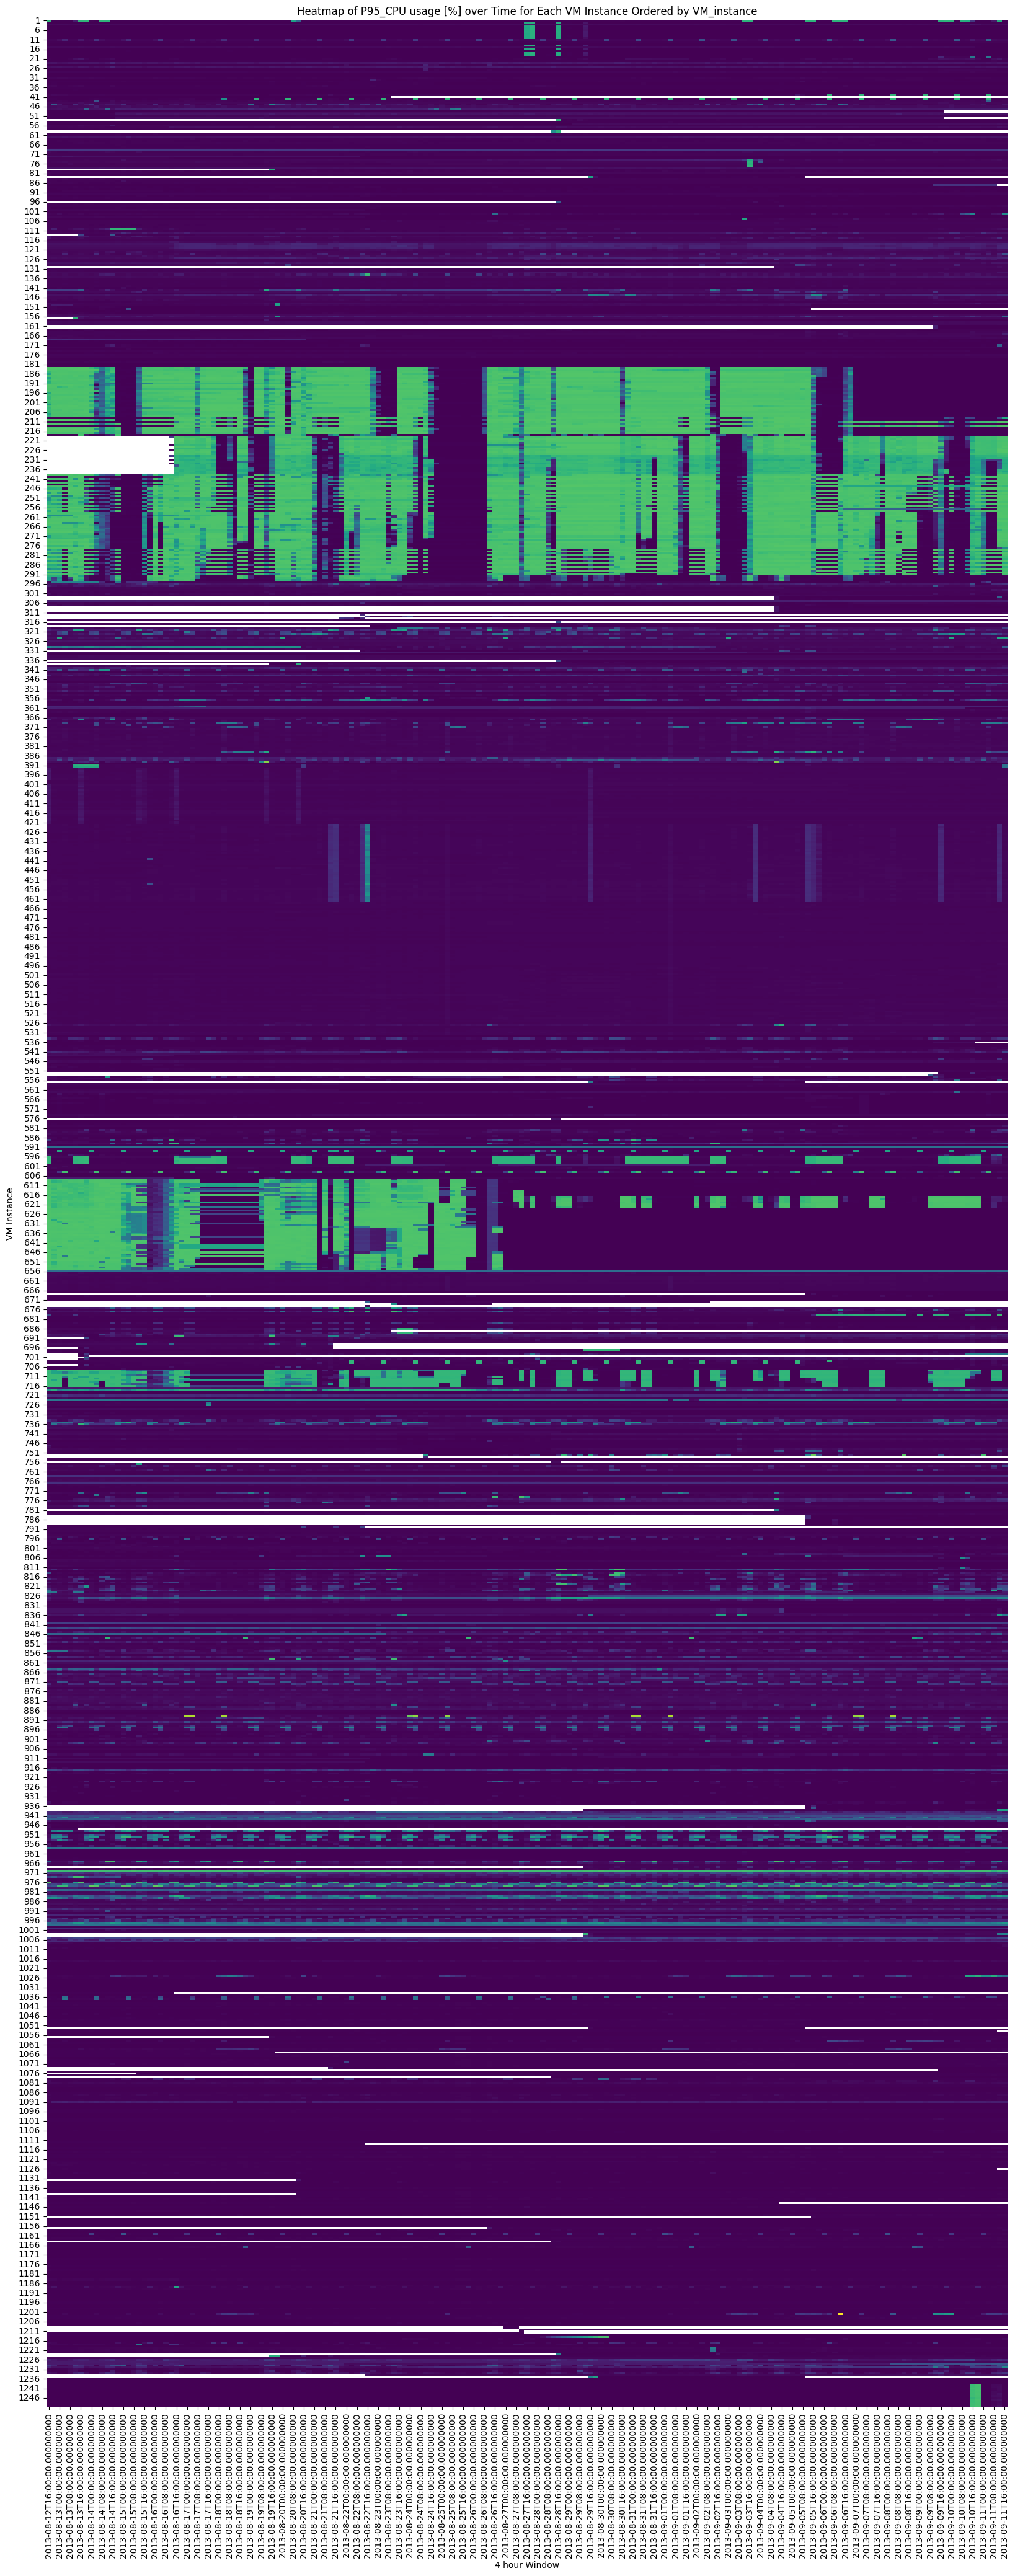

In [0]:
def perf_heatmap(df: DataFrame, metric: str, rank_metric: bool = False):
    df = df.toPandas()
    
    y_index = 'VM_instance'
    if(rank_metric):
        df.set_index('rank')
        y_index = 'rank'
    else:
        df['VM_instance'] = df['VM_instance'].astype(int)
        df.set_index('VM_instance')

    pivot_table = df.pivot(y_index, 'end', metric)
    pivot_table.sort_index(level=0, ascending=True, inplace=True)

    plt.figure(figsize=(20, 50))
    sns.heatmap(pivot_table, cmap='viridis', cbar=False)
    plt.title(f'Heatmap of {metric} over Time for Each VM Instance Ordered by {y_index}')
    plt.xlabel('4 hour Window')
    plt.ylabel('VM Instance')
    plt.show()


perf_heatmap(ranked_perf_counters_CPU,'P95_CPU usage [%]')

#### Insights ####

Right out the gate it looks like the __VMs are not grouped ranomly__.  We see clear bands of utilization that can range between a couple hundread to just a handful

#### Examples:#### 

__A band of many VMS running long term high compute workloads, probably for the same application.__

![](https://raw.githubusercontent.com/MorganBratt/BIGDATA-510AAu23__ClassProject/main/img/cpu1.png)

__A similar band of multiple VMs that ran a high intensity workflow, and then stopped for 2 weeks.__

![](https://raw.githubusercontent.com/MorganBratt/BIGDATA-510AAu23__ClassProject/main/img/cpu_hot_then_cold.png)

__VMs that have a simlar sporatic footprint of utilization.  Could be on-demand ad hoc workflows.__

![](https://raw.githubusercontent.com/MorganBratt/BIGDATA-510AAu23__ClassProject/main/img/sporatic_cpu.png)

__Another small set of VMs with the classic "saw-tooth" pattern of daily utilization.__

![](https://raw.githubusercontent.com/MorganBratt/BIGDATA-510AAu23__ClassProject/main/img/daily_cpu.png)

__Finally bands of almost no utilization.  "Frozen" VMs that are opportunities for reclamation.__

![](https://raw.githubusercontent.com/MorganBratt/BIGDATA-510AAu23__ClassProject/main/img/cold_cpu.png)



### CPU Ranked by Total Utilization ###

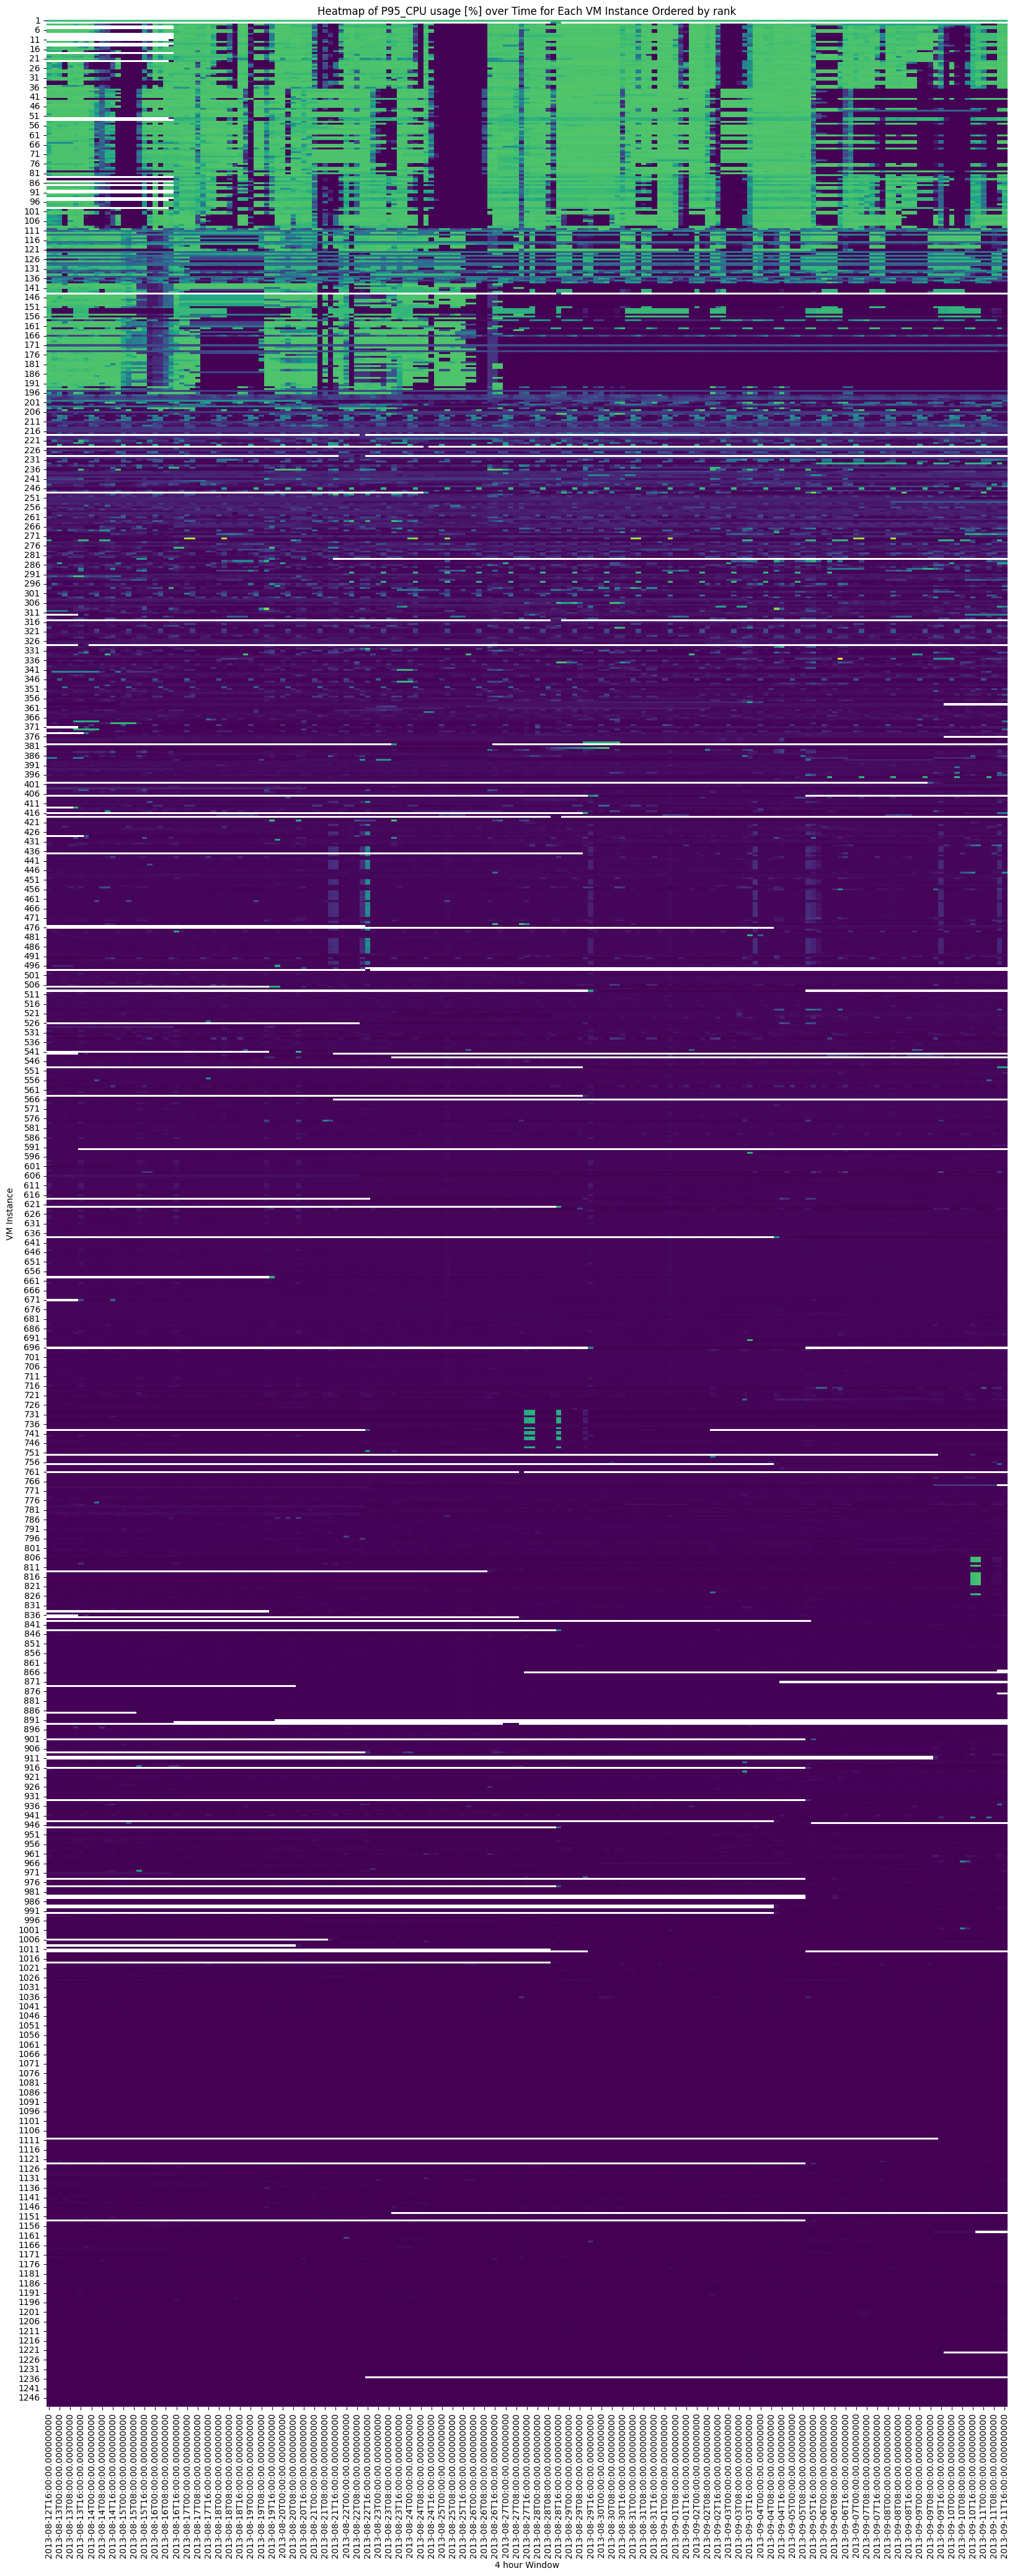

In [0]:
perf_heatmap(ranked_perf_counters_CPU,'P95_CPU usage [%]', True)

#### Insights ####

Here, pretending that we didn't have a group of ordered VMs, I experimented with a "quick and dirty" way to group VMs based on their utilization.  Highest utilization is at the top and lowest at the bottom.  While not perfect this did group some of the same patterns we saw before and showed the issues with underutilized compute.


### Memory ###

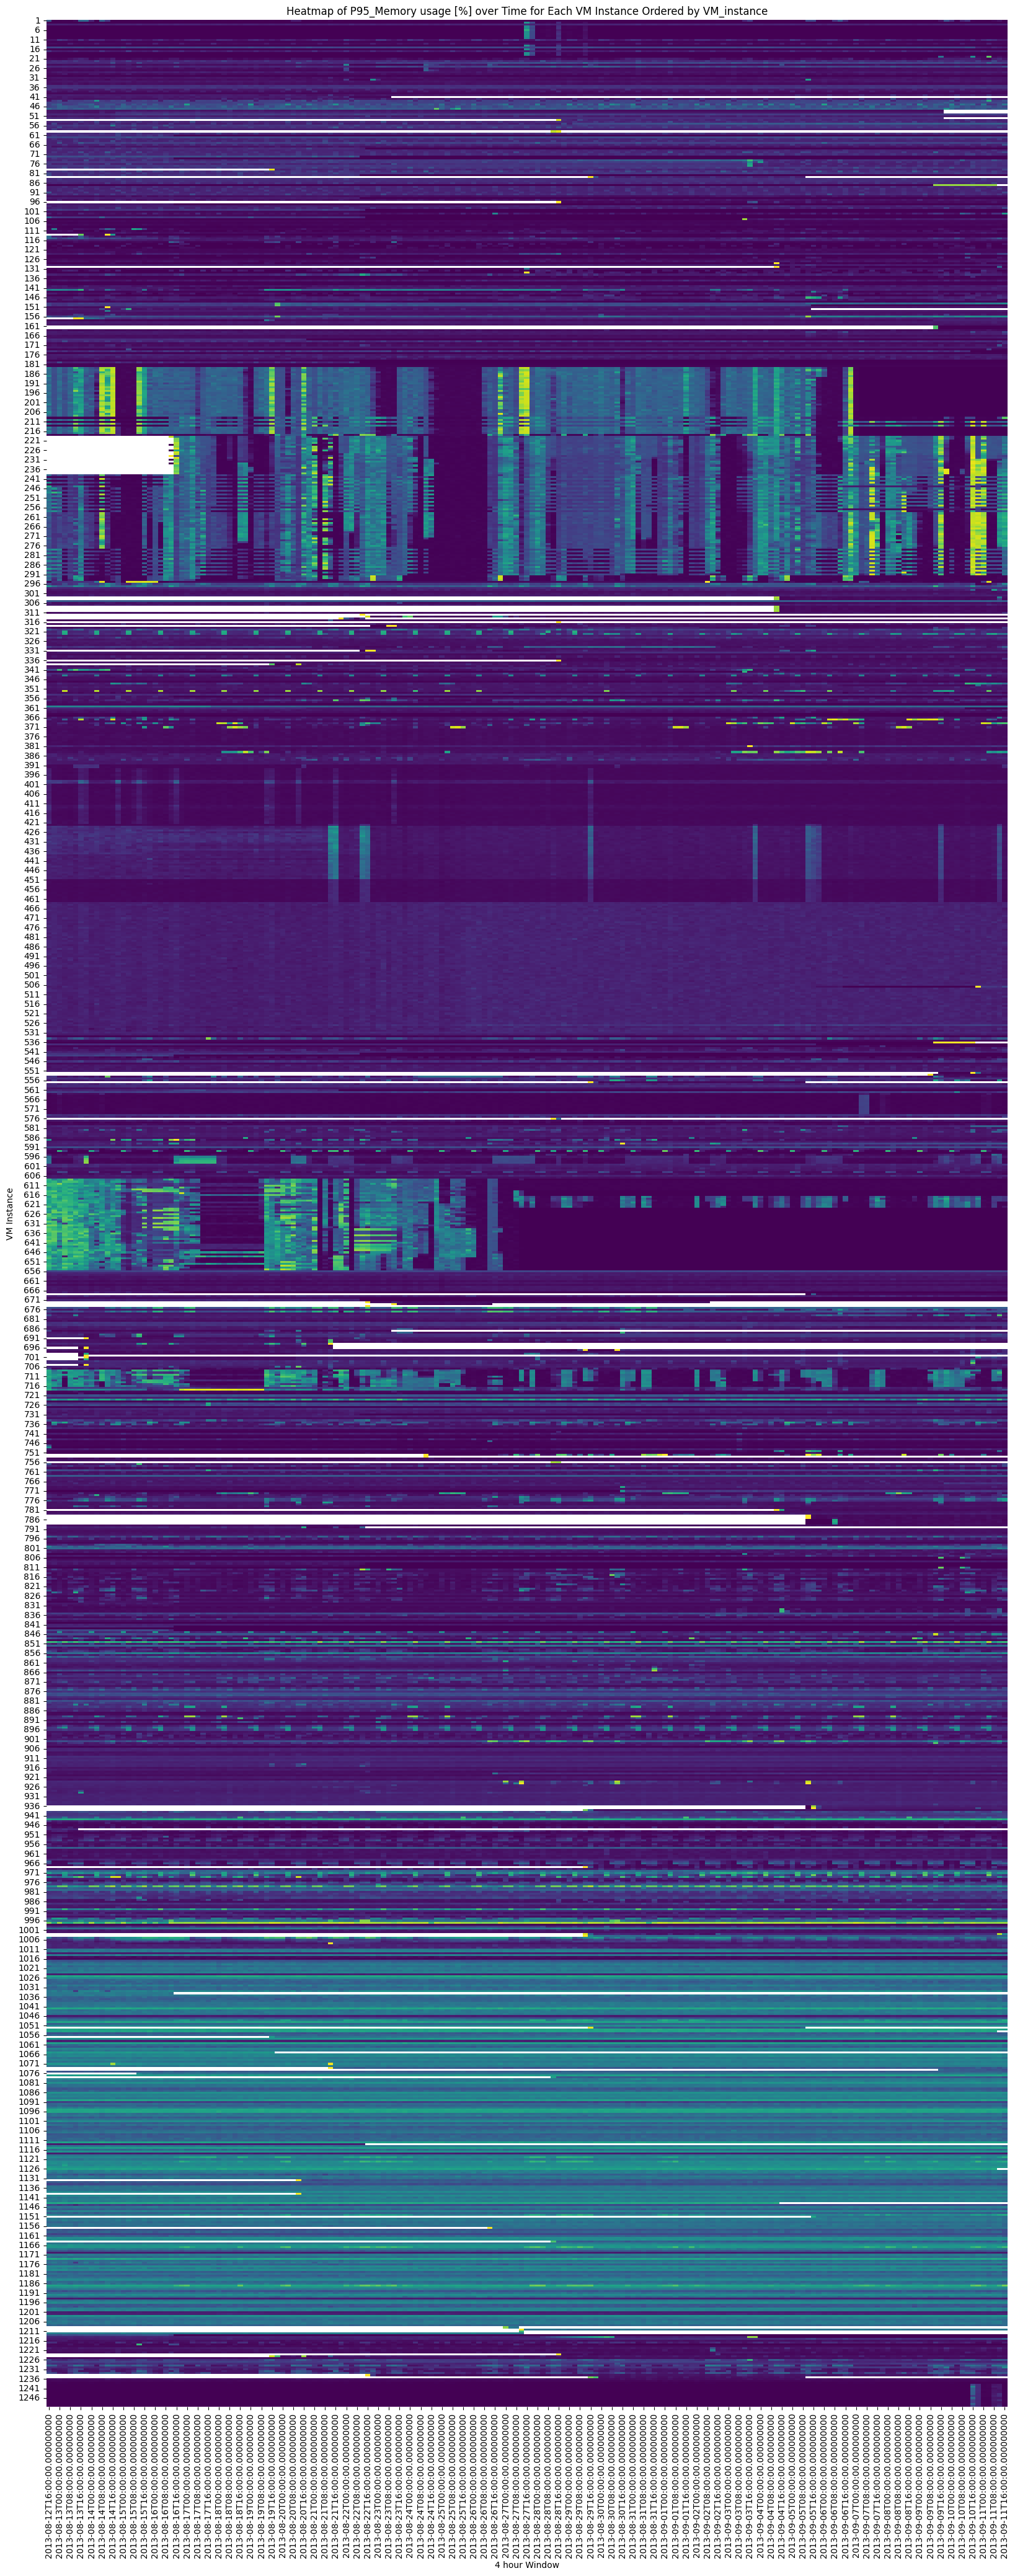

In [0]:

#remove some outliers
# ranked_perf_counters_Memory = (
#     ranked_perf_counters_Memory
#     .where(col("P95_Memory usage [%]") < 100)
# )

perf_heatmap(ranked_perf_counters_Memory,'P95_Memory usage [%]')

#### Insights ####

Switching back to our ordered VMs but this time looking at memory we also notice some patterns.

#### Examples:#### 

__Here when looking at the same pattern of VMs with similar CPU footprint, we can see that the memory footprint matches up.  We can also see as workload ramp the memory utiliization spikes and then stabilizes where the CPU has a steady ramp.__

__CPU:__
![](https://raw.githubusercontent.com/MorganBratt/BIGDATA-510AAu23__ClassProject/main/img/cpu1.png)

__Memory__
![](https://raw.githubusercontent.com/MorganBratt/BIGDATA-510AAu23__ClassProject/main/img/mem1.png)

__Returning to our "frozen" servers we see that these machines tend to grab up a decent amount of memory and never release it.  To mee this seems like the classic pattern of system memory used by an OS.  Illustrating again that these are forgotten\standby machines.__

__CPU:__
![](https://raw.githubusercontent.com/MorganBratt/BIGDATA-510AAu23__ClassProject/main/img/cold_cpu.png)

__Memory__
![](https://raw.githubusercontent.com/MorganBratt/BIGDATA-510AAu23__ClassProject/main/img/cold_mem.png)

### Network Traffic Received ###

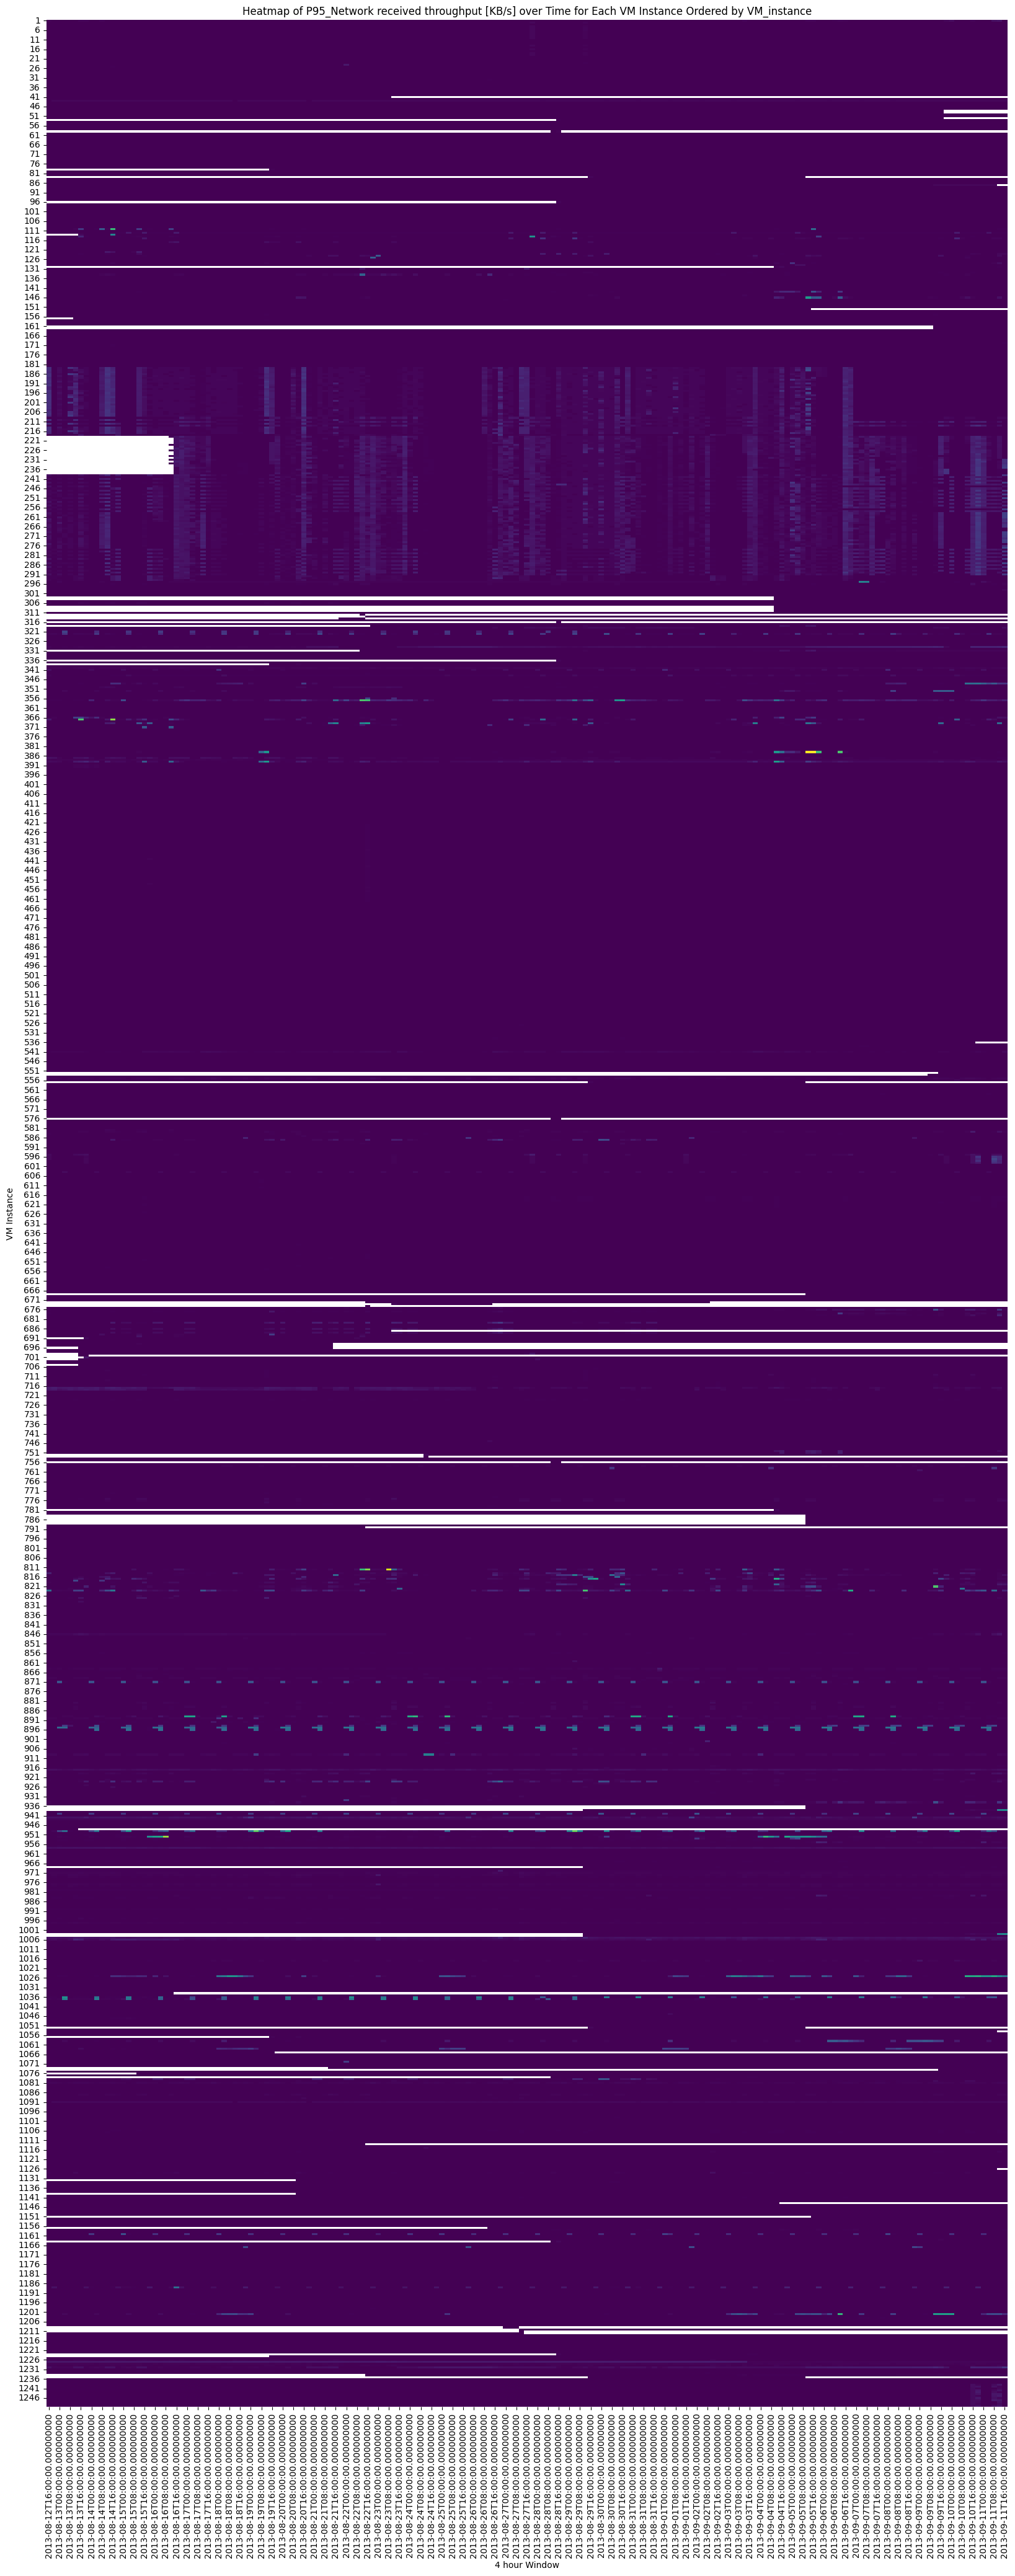

In [0]:
#  |-- P95_Disk read throughput [KB/s]: double (nullable = true)
#  |-- P95_Disk write throughput [KB/s]: double (nullable = true)
#  |-- P95_Network received throughput [KB/s]: double (nullable = true)
#  |-- P95_Network transmitted throughput [KB/s]: double (nullable = true)

# 
# metric = "P95_Disk read throughput [KB/s]"
# metric = "P95_Disk write throughput [KB/s]"
metric = "P95_Network received throughput [KB/s]"
# metric = "P95_Network transmitted throughput [KB/s]"
perf_heatmap(get_ranked_counters(perf_95,metric),metric)


#### Insights ####

Switching back to our ordered VMs but this time looking at memory we also notice some patterns.

#### Examples:#### 

__Now that we have Network traffic recieved, we can look at our high compute VMs and see that network traffic also follows the patterns we see in CPU and Memory.  This tells us that these applications have a pepdenency on external resources for their compute cycles.__

![](https://raw.githubusercontent.com/MorganBratt/BIGDATA-510AAu23__ClassProject/main/img/compare_same.png)

__We can also see the opposite.  Here we have machines that ran intense CPU and Memory activities, but have no network recived traffic to speak of.  Maybe thse machines write to disk, or send off their data.__

![](https://raw.githubusercontent.com/MorganBratt/BIGDATA-510AAu23__ClassProject/main/img/compare_diff.png)